In [3]:
import numpy as np

import candel
from scipy.stats import norm
from scipy.integrate import simpson

import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
r2mu = candel.Distance2Distmod()
mu2r = candel.Distmod2Distance()
log_drdmu = candel.LogGrad_Distmod2ComovingDistance()

## Distance modulus

The shift is  0.006658712740417627


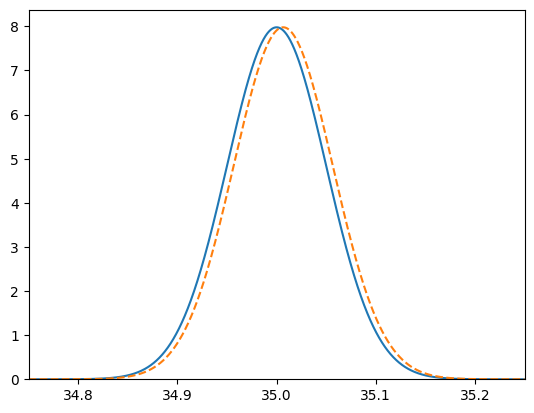

In [85]:
# mu_mean = 18.477
# mu_std = 0.026

# mu_mean = 29.387
# mu_std = 0.057

mu_mean = 35
mu_std = 0.05

x = np.linspace(mu_mean - 5 * mu_std, mu_mean + 5 * mu_std, 10000)
x_r = mu2r(x)

y = norm.pdf(x, mu_mean, mu_std)

# ynew = y * mu2r(x)**2 * drdmu(x)
ynew = y * (x_r**5 * np.exp(log_drdmu(x)))
ynew /= ynew.mean()
ynew /= simpson(ynew, x=x)

print("The shift is ", simpson(x * ynew, x) - mu_mean)

plt.figure()
plt.plot(x, y, label="Prior", color="C0")
plt.plot(x, ynew, label="Posterior", color="C1", ls="--")

plt.xlim(x[0], x[-1])
plt.ylim(0)
plt.show()

### Mpc distance

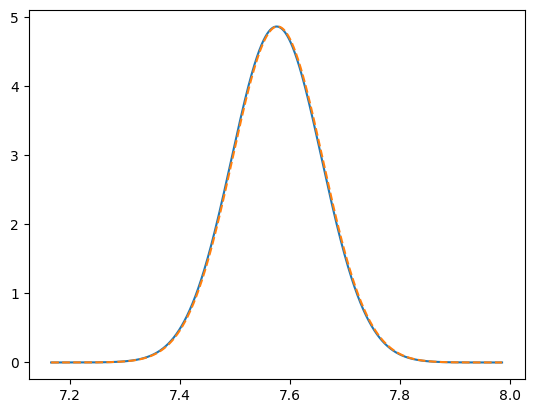

In [91]:
mu = 7.576
std = 0.082

x = np.linspace(mu - 5 * std, mu + 5 * std, 10000)
y = norm.pdf(x, mu, std)

ynew = y * x**2
ynew /= simpson(ynew, x=x)

plt.figure()
plt.plot(x, y, label="Prior", color="C0")
plt.plot(x, ynew, label="Posterior", color="C1", ls="--")
plt.show()